# tf Variable


In [14]:
import numpy as np

import tensorflow as tf
tf.executing_eagerly()

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus: tf.config.experimental.set_memory_growth(gpus[0], True)

### Linear Model
$$
f(W, b, x) = W  x + b
$$
If you training $W$ and $b$ from data $x$, you should  use `tf.variable` to declare `W` and `b` in python.

In [44]:
class Model(object):
    def __init__(self):
        # Initialize variable to (5.0, 0.0)
        # In practice, these should be initialized to random values.
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    
    def __call__(self, x):
        return self.W * x + self.b

model = Model()

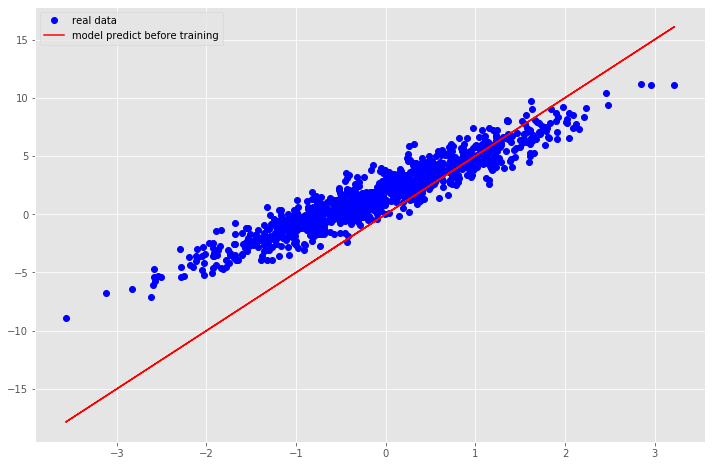

In [45]:
## toy_data
## Note that you never know TRUE_W and TRUE_b practically.

TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

plt.figure(figsize=(12, 8))
plt.plot(inputs.numpy(), outputs.numpy(), 'bo')
plt.plot(inputs, model(inputs), c='r')
plt.legend(['real data', 'model predict before training'])

### Loss
We use L2 loss to train our model $f(W, b, x)$. When we have training data $D = \{(x_1, y_1), ..., (x_N, y_N) \}$, the L2 loss is writen below.

$$
{\rm Loss}(W, b, x, y) = \sum_{i=1}^N (f(W, b, x_i) - y_i)^2
$$

In [46]:
def loss(model, x, desired_y):
    predicted_y = model(x)
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

### training

We are going to training $W$ and $b$ while $x$ and $y$ is observed data (= constant), so we often let ${\rm Loss}(W, b, x, y)$ to ${\rm Loss}(W, b)$.Gradient Descent method to W and b are writen below.

$$
\begin{align}
W &\leftarrow W - \epsilon \frac{\partial {\rm Loss}(W, b)}{\partial W} \\\
b &\leftarrow b - \epsilon \frac{\partial {\rm Loss}(W, b)}{\partial b}
\end{align}
$$

This method is very simple and widely used in machine learning, especially Neural Networks.

In [47]:
def train(model, inputs, outputs, learning_rate):
    ## When you use auto differential, 
    ## Memorize calucration graph using tf.GradientTape
    with tf.GradientTape() as t:
        current_loss = loss(model, inputs, outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [50]:
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model, inputs, outputs)

    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
          (epoch, Ws[-1], bs[-1], current_loss))

Epoch  0: W=4.61 b=0.37, loss=6.49377
Epoch  1: W=4.27 b=0.70, loss=4.44652
Epoch  2: W=4.00 b=0.97, loss=3.15962
Epoch  3: W=3.78 b=1.18, loss=2.35066
Epoch  4: W=3.61 b=1.34, loss=1.84215
Epoch  5: W=3.47 b=1.47, loss=1.52249
Epoch  6: W=3.36 b=1.57, loss=1.32155
Epoch  7: W=3.28 b=1.66, loss=1.19524
Epoch  8: W=3.21 b=1.72, loss=1.11584
Epoch  9: W=3.16 b=1.77, loss=1.06593


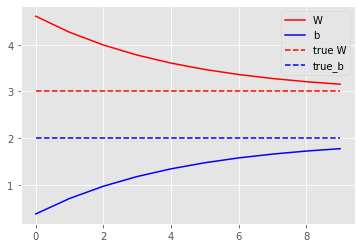

In [51]:
# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()

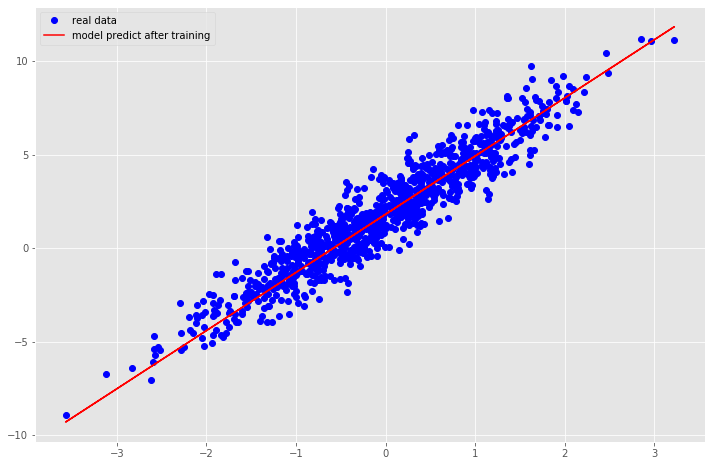

In [52]:
plt.figure(figsize=(12,8))
plt.plot(inputs.numpy(), outputs.numpy(), 'bo')
plt.plot(inputs, model(inputs), c='r')
plt.legend(['real data', 'model predict after training'])